In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np 
import pandas as pd 
import os


# Set up the environment

# Read and prepare the data

In [2]:
# Generate a Pandas DataFrame
twitter_accounts_df: pd.DataFrame = pd.read_csv("twitter_human_bots_dataset.csv", index_col=0)
print(f"Dataset shape {twitter_accounts_df.shape}")

Dataset shape (37438, 19)


In [3]:
# Take a look to the Data
print(f"Dataset columns: {twitter_accounts_df.columns}")
twitter_accounts_df.head()

Dataset columns: Index(['created_at', 'default_profile', 'default_profile_image', 'description',
       'favourites_count', 'followers_count', 'friends_count', 'geo_enabled',
       'id', 'lang', 'location', 'profile_background_image_url',
       'profile_image_url', 'screen_name', 'statuses_count', 'verified',
       'average_tweets_per_day', 'account_age_days', 'account_type'],
      dtype='object')


created_at  default_profile  default_profile_image  \
0  2016-10-15 21:32:11            False                  False   
1  2016-11-09 05:01:30            False                  False   
2  2017-06-17 05:34:27            False                  False   
3  2016-07-21 13:32:25             True                  False   
4  2012-01-15 16:32:35            False                  False   

                                         description  favourites_count  \
0  Blame @xaiax, Inspired by @MakingInvisible, us...                 4   
1  Photographing the American West since 1980. I ...               536   
2  Scruffy looking nerf herder and @twitch broadc...              3307   
3  Wife.Godmother.Friend.Feline Fanatic! Assistan...              8433   
4               Loan coach at @mancity & Aspiring DJ                88   

   followers_count  friends_count  geo_enabled                  id lang  \
0             1589              4        False  787405734442958848   en   
1              860            880        False  796216118331310080   en   
2              172            594         True  875949740503859204   en   
3              517            633         True  756119643622735875   en   
4           753678            116         True           464781334   en   

                  location                      profile_background_image_url  \
0                  unknown  http://abs.twimg.com/images/themes/theme1/bg.png   
1           Estados Unidos  http://abs.twimg.com/images/themes/theme1/bg.png   
2          Los Angeles, CA  http://abs.twimg.com/images/themes/theme1/bg.png   
3           Birmingham, AL                                               NaN   
4  England, United Kingdom  http://abs.twimg.com/images/themes/theme1/bg.png   

                                   profile_image_url      screen_name  \
0  http://pbs.twimg.com/profile_images/7874121826...  best_in_dumbest   
1  http://pbs.twimg.com/profile_images/8023296328...     CJRubinPhoto   
2  http://pbs.twimg.com/profile_images/1278890453...         SVGEGENT   
3  http://pbs.twimg.com/profile_images/1284884924...    TinkerVHELPK5   
4  http://pbs.twimg.com/profile_images/9952566258...    JoleonLescott   

   statuses_count  verified  average_tweets_per_day  account_age_days  \
0           11041     False                   7.870              1403   
1             252     False                   0.183              1379   
2            1001     False                   0.864              1159   
3            1324     False                   0.889              1489   
4            4202      True                   1.339              3138   

  account_type  
0          bot  
1        human  
2        human  
3        human  
4        human

In [4]:
# Functions to preprocess the DataFrame
def convert_bool_to_int(data: pd.DataFrame, boolean_cols: list):
    try:
        for col in boolean_cols:
            data[col] = data[col].astype(int)
    except Exception as e:
        print(e)
    return data

def popularity_metric(friends_count: int, followers_count: int):
    return np.round(np.log(1+friends_count) * np.log(1+followers_count), 3)


def compute_popularity_metric(row):
    return popularity_metric(friends_count=row["friends_count"],
                             followers_count=row["followers_count"])

In [5]:
# Preprocess boolean columns
boolean_cols: list = ["default_profile", "default_profile_image",
                      "geo_enabled", "verified"]
twitter_accounts_df = convert_bool_to_int(data=twitter_accounts_df, boolean_cols=boolean_cols)
twitter_accounts_df.head()

created_at  default_profile  default_profile_image  \
0  2016-10-15 21:32:11                0                      0   
1  2016-11-09 05:01:30                0                      0   
2  2017-06-17 05:34:27                0                      0   
3  2016-07-21 13:32:25                1                      0   
4  2012-01-15 16:32:35                0                      0   

                                         description  favourites_count  \
0  Blame @xaiax, Inspired by @MakingInvisible, us...                 4   
1  Photographing the American West since 1980. I ...               536   
2  Scruffy looking nerf herder and @twitch broadc...              3307   
3  Wife.Godmother.Friend.Feline Fanatic! Assistan...              8433   
4               Loan coach at @mancity & Aspiring DJ                88   

   followers_count  friends_count  geo_enabled                  id lang  \
0             1589              4            0  787405734442958848   en   
1              860            880            0  796216118331310080   en   
2              172            594            1  875949740503859204   en   
3              517            633            1  756119643622735875   en   
4           753678            116            1           464781334   en   

                  location                      profile_background_image_url  \
0                  unknown  http://abs.twimg.com/images/themes/theme1/bg.png   
1           Estados Unidos  http://abs.twimg.com/images/themes/theme1/bg.png   
2          Los Angeles, CA  http://abs.twimg.com/images/themes/theme1/bg.png   
3           Birmingham, AL                                               NaN   
4  England, United Kingdom  http://abs.twimg.com/images/themes/theme1/bg.png   

                                   profile_image_url      screen_name  \
0  http://pbs.twimg.com/profile_images/7874121826...  best_in_dumbest   
1  http://pbs.twimg.com/profile_images/8023296328...     CJRubinPhoto   
2  http://pbs.twimg.com/profile_images/1278890453...         SVGEGENT   
3  http://pbs.twimg.com/profile_images/1284884924...    TinkerVHELPK5   
4  http://pbs.twimg.com/profile_images/9952566258...    JoleonLescott   

   statuses_count  verified  average_tweets_per_day  account_age_days  \
0           11041         0                   7.870              1403   
1             252         0                   0.183              1379   
2            1001         0                   0.864              1159   
3            1324         0                   0.889              1489   
4            4202         1                   1.339              3138   

  account_type  
0          bot  
1        human  
2        human  
3        human  
4        human

In [6]:
print(f"Dataset columns: {twitter_accounts_df.columns}")


Dataset columns: Index(['created_at', 'default_profile', 'default_profile_image', 'description',
       'favourites_count', 'followers_count', 'friends_count', 'geo_enabled',
       'id', 'lang', 'location', 'profile_background_image_url',
       'profile_image_url', 'screen_name', 'statuses_count', 'verified',
       'average_tweets_per_day', 'account_age_days', 'account_type'],
      dtype='object')


In [7]:
# Create a custom metric to measure the popularity of an input account
twitter_accounts_df["popularity"] = twitter_accounts_df.apply(compute_popularity_metric, axis=1)

# Let's show some examples of such value
twitter_accounts_df[['popularity']]

popularity
0          11.864
1          45.827
2          32.922
3          40.325
4          64.445
...           ...
37433      34.634
37434      89.249
37435      59.654
37436      25.255
37437       6.610

[37438 rows x 1 columns]

# EDA

In [8]:
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
from collections import OrderedDict

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['figure.figsize'] = 12, 8
mpl.rcParams['font.sans-serif'] = ['Tahoma']
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [9]:
# Set up some parameters for EDA
palette: str = "husl"
grouped: str = "account_type"
default_value: str = "unknown"

In [10]:
def get_labels_colors_from_pandas_column(df: pd.DataFrame, column: str, palette: str):
    data_labels: dict = dict()
    try:
        labels: list = df[column].unique().tolist()
        colors: list = sns.color_palette(palette, len(labels))
        data_labels: dict = dict(zip(labels, colors))
    except Exception as e:
        logger.error(e)
    return data_labels

# Retrieve labels and additional parameters to plot figures
data_labels: dict = get_labels_colors_from_pandas_column(
    df=twitter_accounts_df, column=grouped, palette=palette)


In [11]:
# Show labels
print(f"Unique Target values: {data_labels.keys()}")

Unique Target values: dict_keys(['bot', 'human'])


In [12]:
# Functions to plot data distributions
def plot_multiple_histograms(data: pd.DataFrame,
                             grouped_col: str,
                             target_col: str,
                             data_labels: dict):
    # Plot
    plt.figure(figsize=(12, 10))
    title = "\n"
    labels: list = list(data_labels.keys())
    for j, i in enumerate(labels):
        x = data.loc[data[grouped_col] == i, target_col]
        mu_x = round(float(np.mean(x)), 3)
        sigma_x = round(float(np.std(x)), 3)
        ax = sns.distplot(x, color=data_labels.get(i), label=i, hist_kws=dict(alpha=.1),
                          kde_kws={'linewidth': 2})
        ax.axvline(mu_x, color=data_labels.get(i), linestyle='--')
        ax.set(xlabel=f"{target_col.title()}", ylabel='Density')
        title += f"Parameters {str(i)}: $G(\mu=$ {mu_x}, $\sigma=$ {sigma_x} \n"
        ax.set_title(title)
    plt.legend(title="Account Type")
    plt.grid()
    plt.tight_layout()
    plt.show()


def plot_multiple_boxplots(data: pd.DataFrame, grouped_col: str, target_col: str,
                           palette: str = "husl"):
    plt.figure(figsize=(12, 10))

    means: dict = data.groupby([grouped_col])[target_col].mean().to_dict(OrderedDict)
    counter: int = 0

    bp = sns.boxplot(x=grouped_col, y=target_col, data=data, palette=palette, order=list(means.keys()))
    bp.set(xlabel='', ylabel=f"{target_col.title()}")
    ax = bp.axes

    for k, v in means.items():
        # every 4th line at the interval of 6 is median line
        # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
        mean = round(v, 2)
        ax.text(
            counter,
            mean,
            f'{mean}',
            ha='center',
            va='center',
            fontweight='bold',
            size=10,
            color='white',
            bbox=dict(facecolor='#445A64'))
        counter += 1
    bp.figure.tight_layout()
    plt.grid()
    plt.show()

C:\Users\nopi\AppData\Local\Temp\ipykernel_12948\3085266892.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, color=data_labels.get(i), label=i, hist_kws=dict(alpha=.1),
C:\Users\nopi\AppData\Local\Temp\ipykernel_12948\3085266892.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distpl

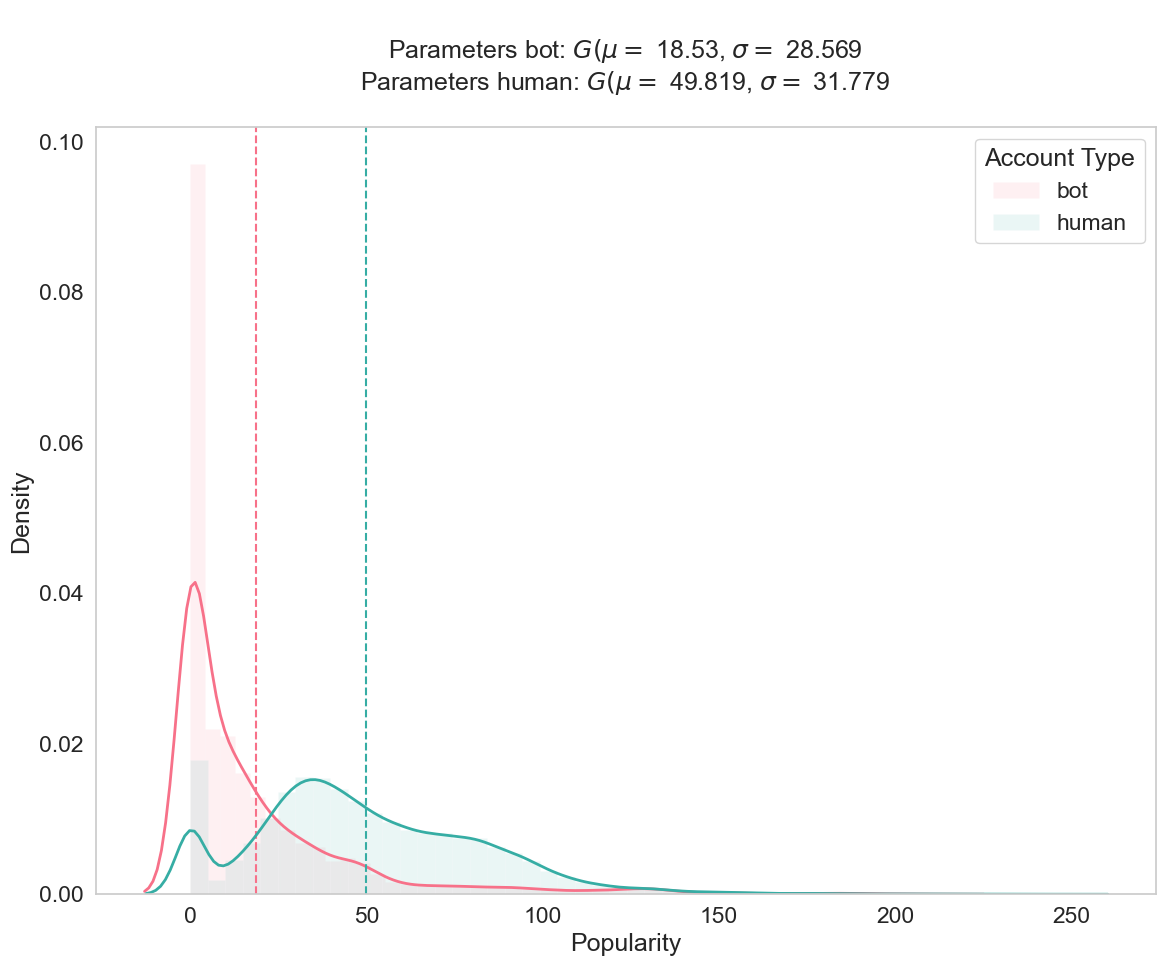

C:\Users\nopi\AppData\Local\Temp\ipykernel_12948\3085266892.py:30: FutureWarning: Starting with pandas version 3.0 all arguments of to_dict will be keyword-only.
  means: dict = data.groupby([grouped_col])[target_col].mean().to_dict(OrderedDict)
C:\Users\nopi\AppData\Local\Temp\ipykernel_12948\3085266892.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.boxplot(x=grouped_col, y=target_col, data=data, palette=palette, order=list(means.keys()))


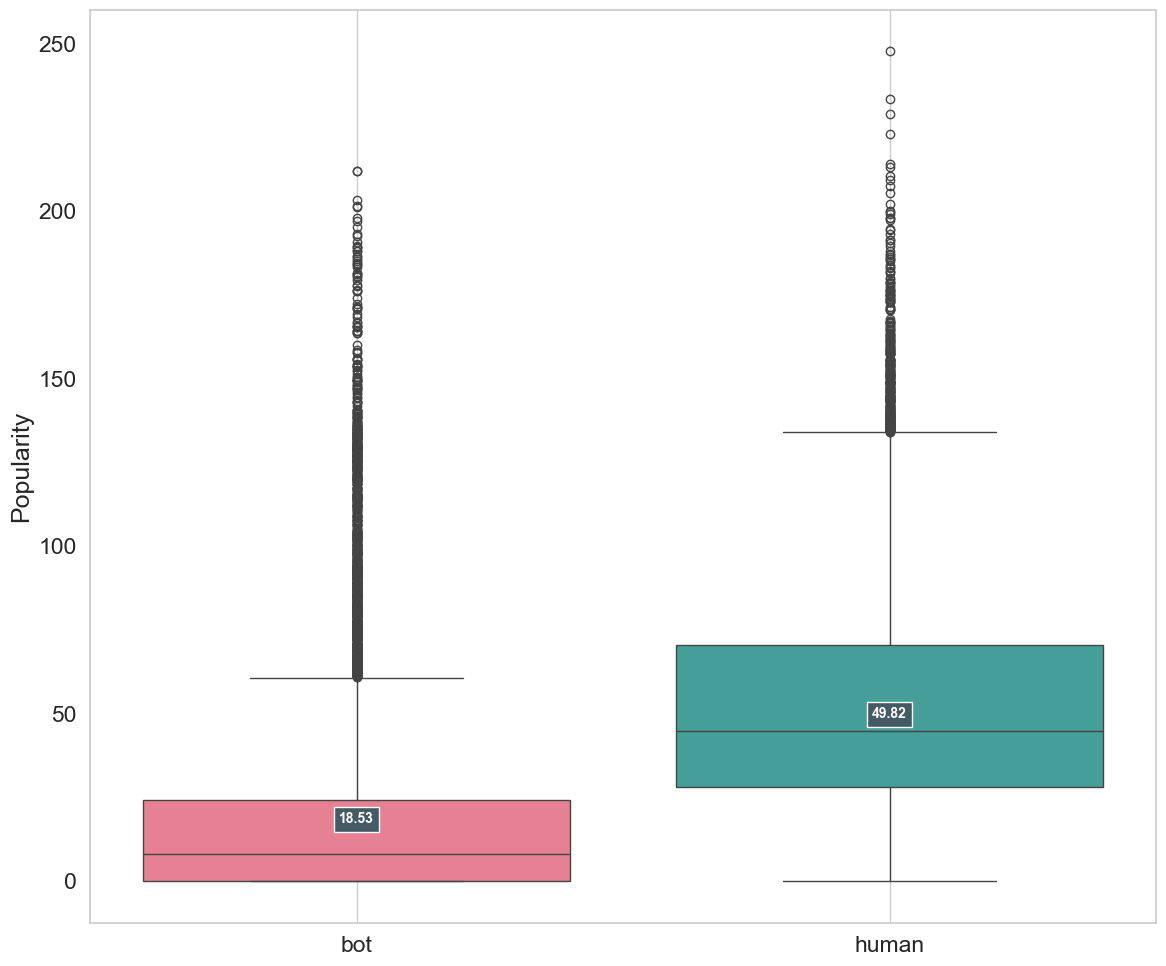

In [13]:
target: str = "popularity"  
# Extract histograms
plot_multiple_histograms(data=twitter_accounts_df, 
                         grouped_col=grouped,
                         data_labels=data_labels,
                         target_col=target)
# Extract Box-plots
plot_multiple_boxplots(data=twitter_accounts_df,
                       grouped_col=grouped,
                       target_col=target,
                       palette=palette)


Let's analyse the average tweets per day

C:\Users\nopi\AppData\Local\Temp\ipykernel_12948\3085266892.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, color=data_labels.get(i), label=i, hist_kws=dict(alpha=.1),
C:\Users\nopi\AppData\Local\Temp\ipykernel_12948\3085266892.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distpl

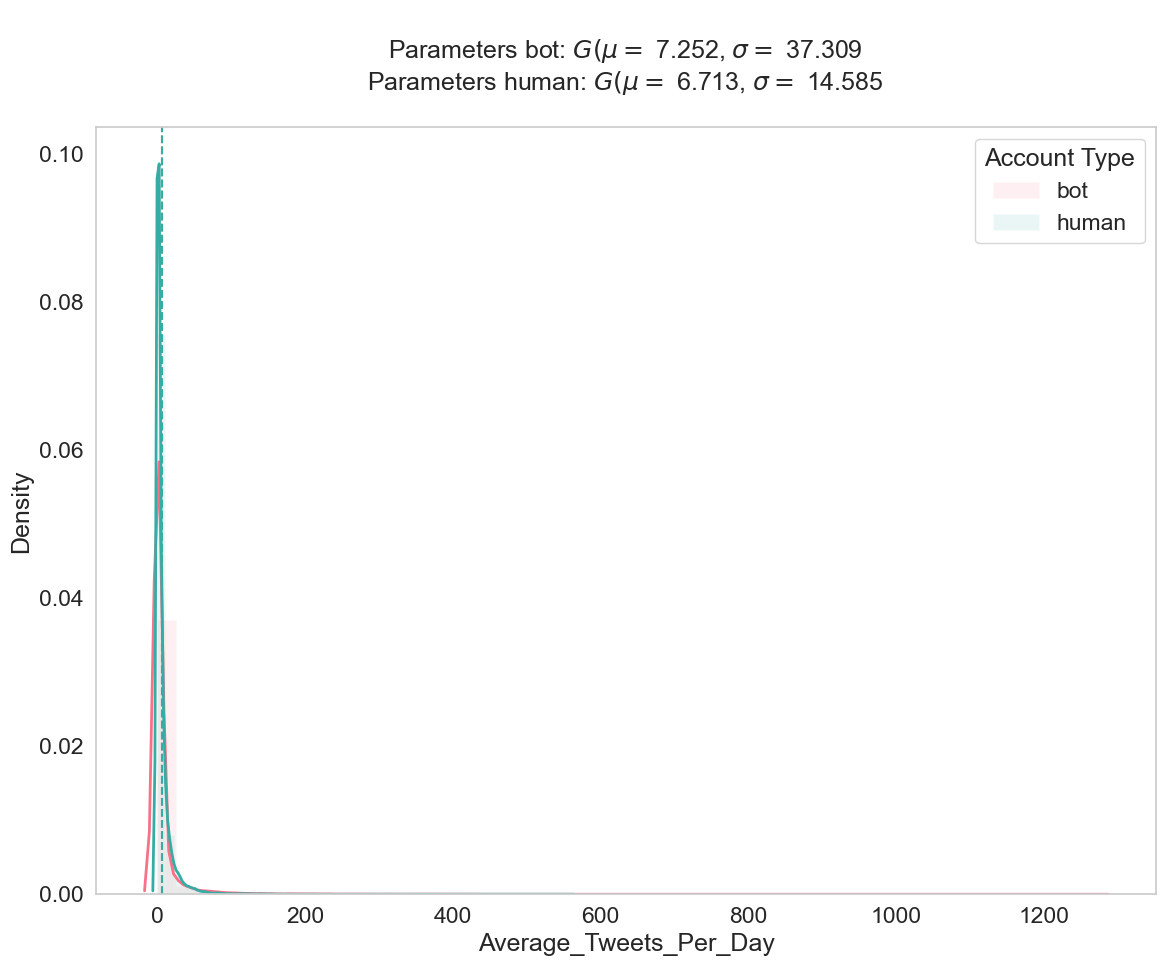

C:\Users\nopi\AppData\Local\Temp\ipykernel_12948\3085266892.py:30: FutureWarning: Starting with pandas version 3.0 all arguments of to_dict will be keyword-only.
  means: dict = data.groupby([grouped_col])[target_col].mean().to_dict(OrderedDict)
C:\Users\nopi\AppData\Local\Temp\ipykernel_12948\3085266892.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.boxplot(x=grouped_col, y=target_col, data=data, palette=palette, order=list(means.keys()))


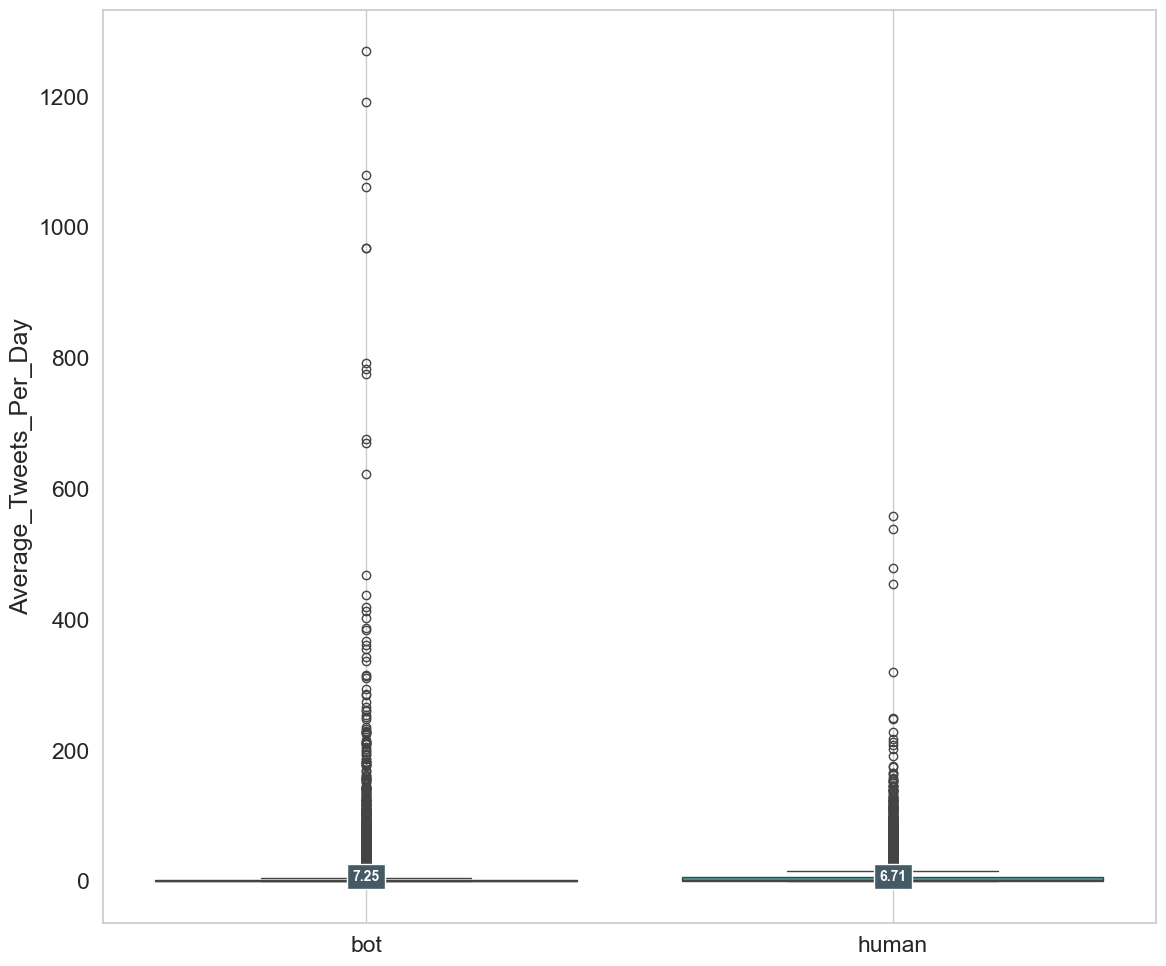

In [14]:
target: str = "average_tweets_per_day"  
# Extract histograms
plot_multiple_histograms(data=twitter_accounts_df, 
                         grouped_col=grouped,
                         data_labels=data_labels,
                         target_col=target)
# Extract Box-plots
plot_multiple_boxplots(data=twitter_accounts_df,
                       grouped_col=grouped,
                       target_col=target,
                       palette=palette)

<Axes: xlabel='account_type'>

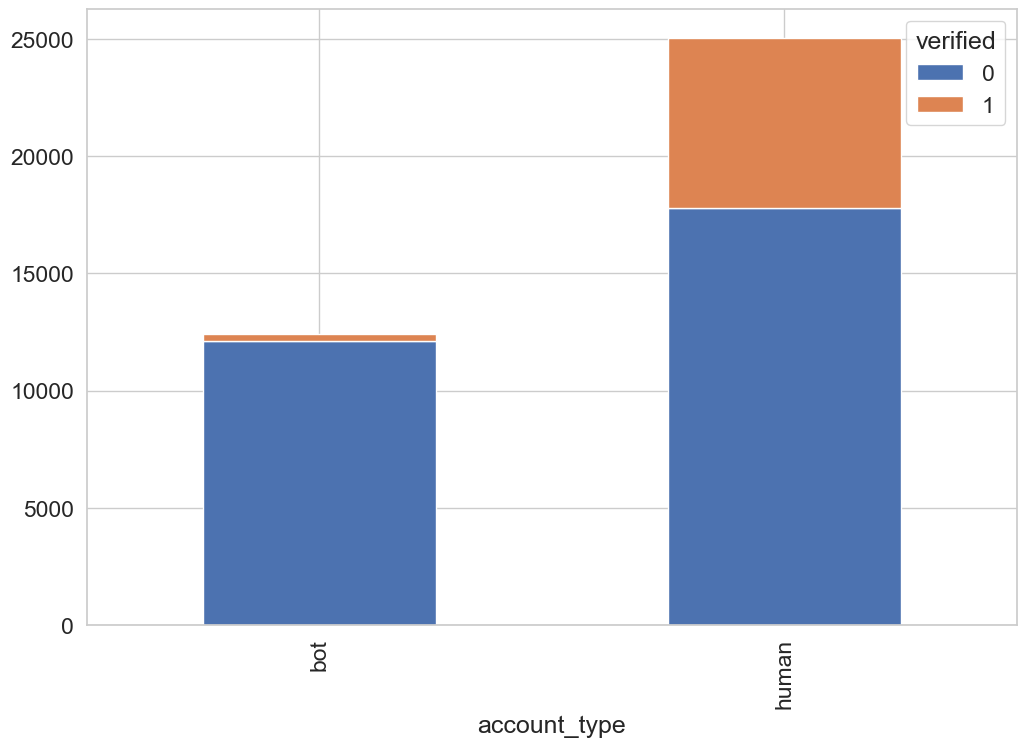

In [15]:
target_col: str = "verified"
twitter_accounts_df2 = twitter_accounts_df.groupby([grouped, target_col])[grouped].count().unstack(target_col)
twitter_accounts_df2.plot(kind='bar', stacked=True)

C:\Users\nopi\AppData\Local\Temp\ipykernel_12948\3085266892.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, color=data_labels.get(i), label=i, hist_kws=dict(alpha=.1),
C:\Users\nopi\AppData\Local\Temp\ipykernel_12948\3085266892.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distpl

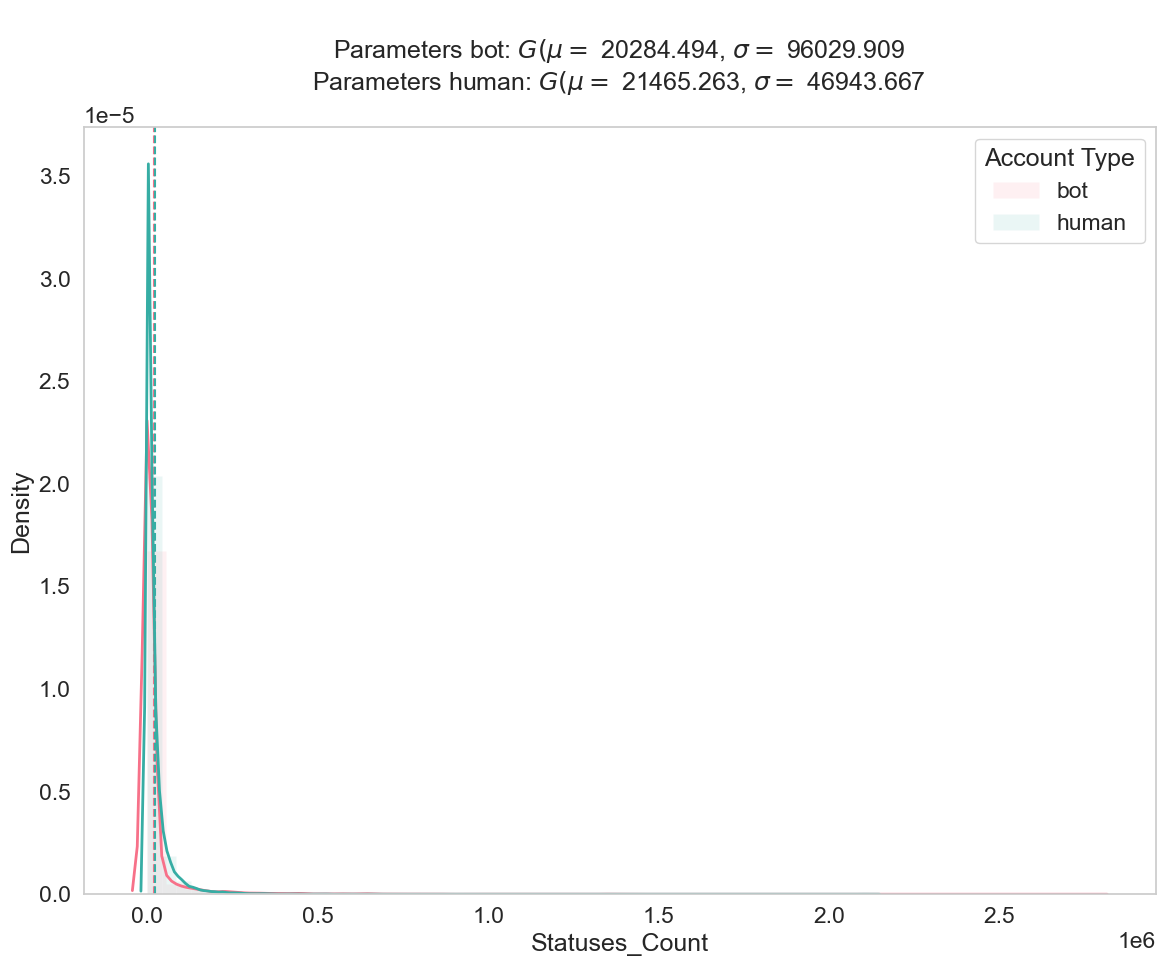

C:\Users\nopi\AppData\Local\Temp\ipykernel_12948\3085266892.py:30: FutureWarning: Starting with pandas version 3.0 all arguments of to_dict will be keyword-only.
  means: dict = data.groupby([grouped_col])[target_col].mean().to_dict(OrderedDict)
C:\Users\nopi\AppData\Local\Temp\ipykernel_12948\3085266892.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.boxplot(x=grouped_col, y=target_col, data=data, palette=palette, order=list(means.keys()))


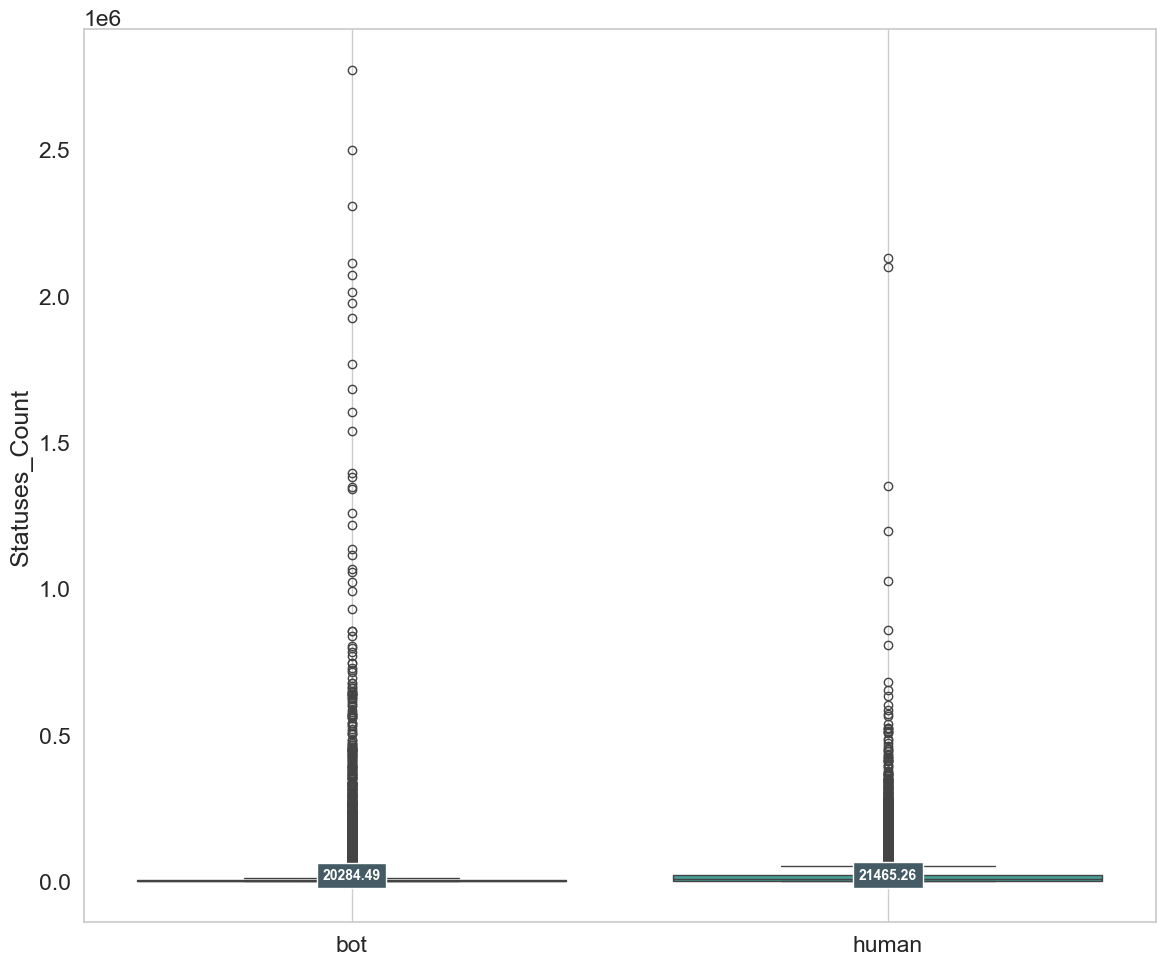

In [16]:
target: str = "statuses_count"  
# Extract histograms
plot_multiple_histograms(data=twitter_accounts_df, 
                         grouped_col=grouped,
                         data_labels=data_labels,
                         target_col=target)
# Extract Box-plots
plot_multiple_boxplots(data=twitter_accounts_df,
                       grouped_col=grouped,
                       target_col=target,
                       palette=palette)

In [17]:
# Preprocess Response variable (account type)
twitter_accounts_df[grouped] = twitter_accounts_df[grouped].astype('category')
twitter_accounts_df.dtypes

created_at                        object
default_profile                    int32
default_profile_image              int32
description                       object
favourites_count                   int64
followers_count                    int64
friends_count                      int64
geo_enabled                        int32
id                                 int64
lang                              object
location                          object
profile_background_image_url      object
profile_image_url                 object
screen_name                       object
statuses_count                     int64
verified                           int32
average_tweets_per_day           float64
account_age_days                   int64
account_type                    category
popularity                       float64
dtype: object

In [18]:
twitter_accounts_df[grouped] = twitter_accounts_df[grouped].cat.codes
twitter_accounts_df.head()


created_at  default_profile  default_profile_image  \
0  2016-10-15 21:32:11                0                      0   
1  2016-11-09 05:01:30                0                      0   
2  2017-06-17 05:34:27                0                      0   
3  2016-07-21 13:32:25                1                      0   
4  2012-01-15 16:32:35                0                      0   

                                         description  favourites_count  \
0  Blame @xaiax, Inspired by @MakingInvisible, us...                 4   
1  Photographing the American West since 1980. I ...               536   
2  Scruffy looking nerf herder and @twitch broadc...              3307   
3  Wife.Godmother.Friend.Feline Fanatic! Assistan...              8433   
4               Loan coach at @mancity & Aspiring DJ                88   

   followers_count  friends_count  geo_enabled                  id lang  \
0             1589              4            0  787405734442958848   en   
1              860            880            0  796216118331310080   en   
2              172            594            1  875949740503859204   en   
3              517            633            1  756119643622735875   en   
4           753678            116            1           464781334   en   

                  location                      profile_background_image_url  \
0                  unknown  http://abs.twimg.com/images/themes/theme1/bg.png   
1           Estados Unidos  http://abs.twimg.com/images/themes/theme1/bg.png   
2          Los Angeles, CA  http://abs.twimg.com/images/themes/theme1/bg.png   
3           Birmingham, AL                                               NaN   
4  England, United Kingdom  http://abs.twimg.com/images/themes/theme1/bg.png   

                                   profile_image_url      screen_name  \
0  http://pbs.twimg.com/profile_images/7874121826...  best_in_dumbest   
1  http://pbs.twimg.com/profile_images/8023296328...     CJRubinPhoto   
2  http://pbs.twimg.com/profile_images/1278890453...         SVGEGENT   
3  http://pbs.twimg.com/profile_images/1284884924...    TinkerVHELPK5   
4  http://pbs.twimg.com/profile_images/9952566258...    JoleonLescott   

   statuses_count  verified  average_tweets_per_day  account_age_days  \
0           11041         0                   7.870              1403   
1             252         0                   0.183              1379   
2            1001         0                   0.864              1159   
3            1324         0                   0.889              1489   
4            4202         1                   1.339              3138   

   account_type  popularity  
0             0      11.864  
1             1      45.827  
2             1      32.922  
3             1      40.325  
4             1      64.445

In [19]:
twitter_accounts_df_num: pd.DataFrame = twitter_accounts_df.copy()
twitter_accounts_df_num: pd.DataFrame = twitter_accounts_df_num._get_numeric_data()
twitter_accounts_df_num.head()


default_profile  default_profile_image  favourites_count  followers_count  \
0                0                      0                 4             1589   
1                0                      0               536              860   
2                0                      0              3307              172   
3                1                      0              8433              517   
4                0                      0                88           753678   

   friends_count  geo_enabled                  id  statuses_count  verified  \
0              4            0  787405734442958848           11041         0   
1            880            0  796216118331310080             252         0   
2            594            1  875949740503859204            1001         0   
3            633            1  756119643622735875            1324         0   
4            116            1           464781334            4202         1   

   average_tweets_per_day  account_age_days  account_type  popularity  
0                   7.870              1403             0      11.864  
1                   0.183              1379             1      45.827  
2                   0.864              1159             1      32.922  
3                   0.889              1489             1      40.325  
4                   1.339              3138             1      64.445

In [20]:
# Remove columns
drop_cols: list = ["id"]
twitter_accounts_df_num.drop(drop_cols, axis=1,inplace=True)
twitter_accounts_df_num.head()

default_profile  default_profile_image  favourites_count  followers_count  \
0                0                      0                 4             1589   
1                0                      0               536              860   
2                0                      0              3307              172   
3                1                      0              8433              517   
4                0                      0                88           753678   

   friends_count  geo_enabled  statuses_count  verified  \
0              4            0           11041         0   
1            880            0             252         0   
2            594            1            1001         0   
3            633            1            1324         0   
4            116            1            4202         1   

   average_tweets_per_day  account_age_days  account_type  popularity  
0                   7.870              1403             0      11.864  
1                   0.183              1379             1      45.827  
2                   0.864              1159             1      32.922  
3                   0.889              1489             1      40.325  
4                   1.339              3138             1      64.445

<Axes: >

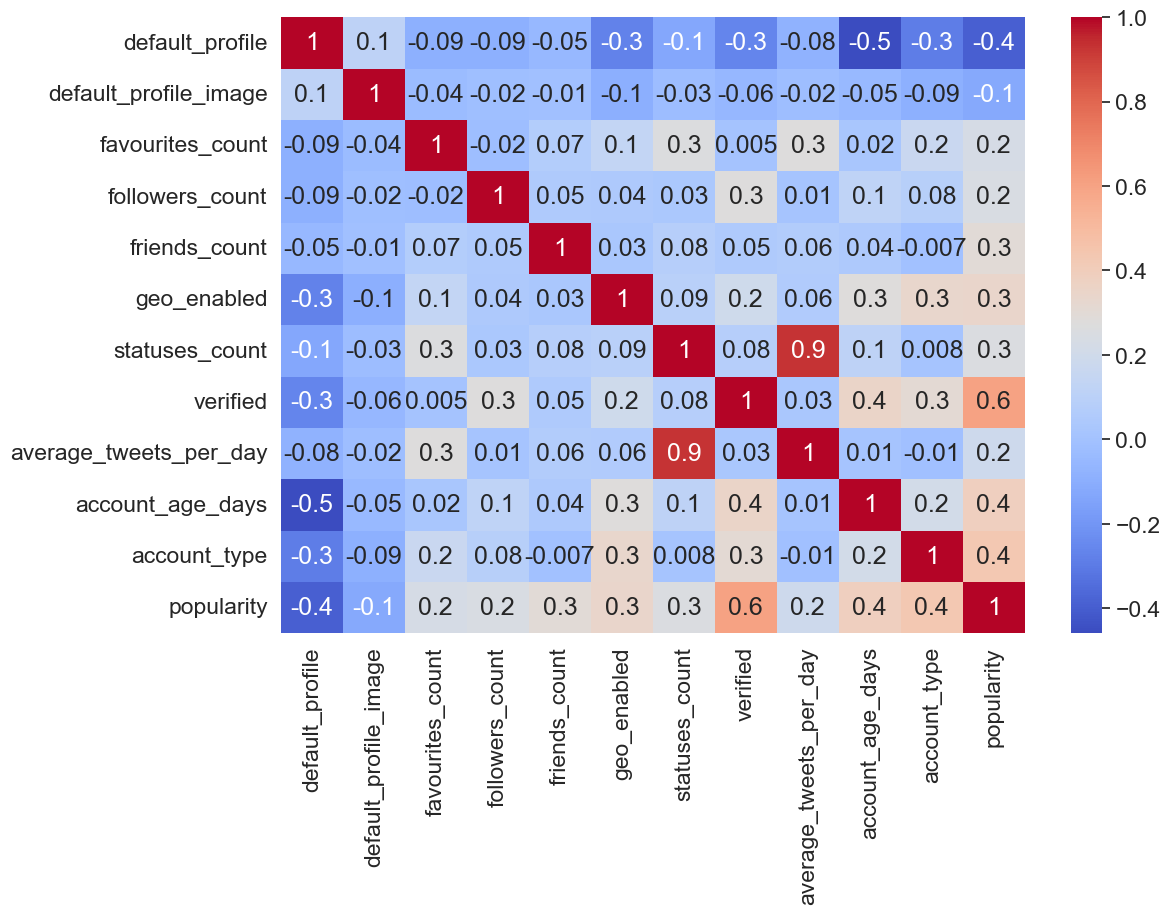

In [21]:
# Compute correlation among the features and the response variable
corr: pd.DataFrame = twitter_accounts_df_num.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot = True, fmt='.1g', cmap= 'coolwarm')

In [22]:
from sklearn.model_selection import train_test_split

X = twitter_accounts_df_num.drop(columns=["account_type"])  # Özellikler
y = twitter_accounts_df_num["account_type"]  # Hedef değişken

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)


In [24]:
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [25]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8737980769230769
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      2487
           1       0.88      0.93      0.91      5001

    accuracy                           0.87      7488
   macro avg       0.87      0.84      0.85      7488
weighted avg       0.87      0.87      0.87      7488



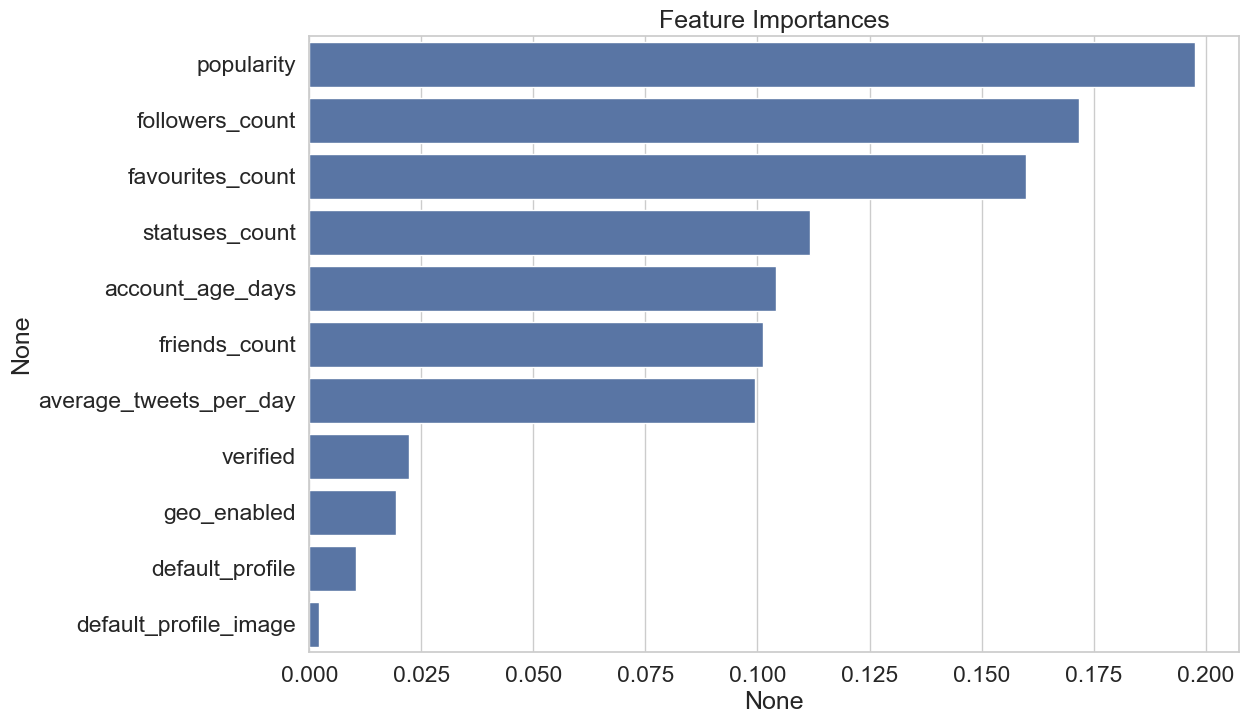

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importances")
plt.show()
